<a href="https://colab.research.google.com/github/phuongnam2002/AI-Machine-Learning/blob/main/Introduce_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Natural Languge Processing

NLP (Natural Language Processing) là 1 phần của AI liên quan đến ngôn ngữ con người.

Những thử thách trong NLP: Nhận diện giọng nói, hiểu được ngôn ngữ tự nhiên của con người và mô phỏng lại ngôn ngữ tự nhiên.


**Ứng dụng**:


*   Personal Assistant: Siri, Cortana, Optimus, ...
*   Auto-Complete: Trong công cụ tiếm kiếm của Goolge khi tìm kiếm một từ gì đấy
*   Spell Checking: Google Doc, Microsoft Word, ...
*   Translation: Google Translate
*   Chatbot







**Phân loại NLP**

NLP được chia thành 2 lĩnh vực chính: Ngôn ngữ học và Khoa học máy tính

Ngôn ngữ học chủ yếu tập trung vào việc hiểu được cấu trúc của ngôn ngữ, bao gồm:

  1. Ngữ âm (Phonetics) : Nghiên cứu âm thanh ngôn ngữ của con người

  2. Âm vị (Phonology) : Nghiên cứu hệ thống âm thanh trong ngôn ngữ của con người

  3. Cú pháp (Syntax) : Nghiên cứu sự hình thành và cấu trúc của một câu nói.

  4. Ngữ nghĩa (Semantics) : Nghiên cứu ý nghĩa của câu nói

  5. Ngữ dụng học (Pragmatics) : Nghiên cứu cách thức các câu nói với ý nghĩa của chúng (semantics) được sử dụng cho các mục đích giao tiếp cụ thể. Cụ thể nói nhiều như vậy thì tóm gọn lại người đối diện muốn biểu thị cái gì.

Trong khi đó Khoa học máy tính lại quan tâm đến việc chuyển đổi các kiến thức chuyên sâu về ngôn ngữ học thành những chương trình máy tính (Program, Application) với sự trợ giúp đắc lực của trí tuệ nhân tạo (AI) nhằm phục vụ con người.

**Processing**



*   Tokenization (tách từ): quá trình tách một cụm từ, câu, đoạn văn, một hoặc nhiều tài liệu văn bản thành các đơn vị nhỏ hơn. Mỗi đơn vị nhỏ hơn này được gọi là Tokens. Có thể coi tokens là các khối xây dựng của NLP và tất cả các mô hình NLP đều xử lý văn bản thô ở cấp độ các Tokens.

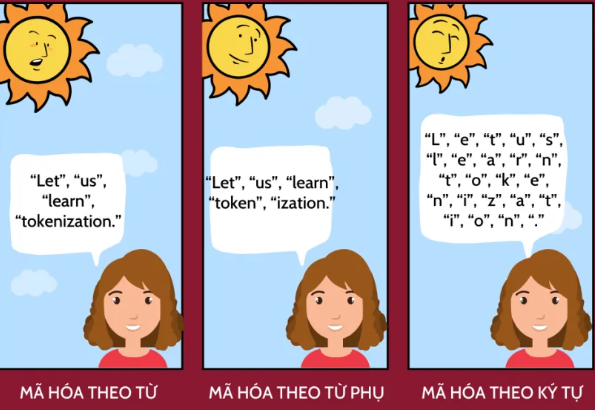






*   Stemming: biến đổi 1 từ về dạng nguyên thể nhưng với 1 số từ bất quy tắc thì không thể đưa về nguyên thể được 

*   Lemmatization: xử lý bằng 1 bộ từ điển nào đó, giải quyết được vấn đề của Stemming nhưng chạy lâu hơn

*   POS Tags: phân loại các từ trong câu.
    Ví dụ: "He is a bad boy" sau khi được POS Tags sẽ là "He/PRP is/VBZ a/DT good/JJ boy/NN"

*   POS Parser: gán nhãn POS cho các từ trong câu. Các bộ parser này thường sẽ tuân theo những quy tắc nào đó hoặc là sử dụng machine learning để phân loại từ một cách hợp lý nhất dựa trên những dữ liệu training đã được gán nhãn bằng tay.

*   Word Segmentation: tách một đoạn text (một chuỗi liên tiếp các ký tự) thành những từ (word hay token) riêng lẻ.

*   Named Entity Recognition (NER): trích từ câu văn ra các thực thể có tên. Ví dụ: Nam - tên riêng, PTIT - công ty, 09xx - SĐT, ... 

*   Chunking: nhóm thông tin riêng lẻ thành các nhóm lớn.








## Bag Of Word

Là 1 kỹ thuật biểu diễn từ, miêu tả số lần xuất hiện của 1 từ trong 1 câu văn. Ta chỉ biết số lượng từ mà không quan tâm đến thứ tự. Dùng BOW vì nó có thể chuyển các input có độ dài thay đổi thành các input có độ dài xác định và ta có thể chuyển text sang number vector tương đương.

In [ ]:
sentenceA = "This is a Great Learning now start learning"
sentenceB = "Learning is a good practice"
sentenceA.strip()
sentenceB.strip()
sentenceA.replace("\\s+"," ")
sentenceB.replace("\\s+"," ")
wordA = sentenceA.lower().split()
wordB = sentenceB.lower().split()

In [ ]:
wordA

['this', 'is', 'a', 'great', 'learning', 'now', 'start', 'learning']

In [ ]:
dictionary = set(wordA).union(set(wordB))
dictionary

{'a', 'good', 'great', 'is', 'learning', 'now', 'practice', 'start', 'this'}

In [ ]:
wordictA = dict.fromkeys(dictionary,0)
wordictB = dict.fromkeys(dictionary,0)

In [ ]:
for i in wordA:
  wordictA[i]+=1

for i in wordB:
  wordictB[i]+=1

In [ ]:
wordictA

{'start': 1,
 'good': 0,
 'is': 1,
 'great': 1,
 'this': 1,
 'learning': 2,
 'practice': 0,
 'a': 1,
 'now': 1}

In [ ]:
import pandas as pd
pd.DataFrame([wordictA,wordictB])

,start,good,is,great,this,learning,practice,a,now
0,1,0,1,1,1,2,0,1,1
1,0,1,1,0,0,1,1,1,0


In [38]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
sentence_1="This is a Great Learning, now start learning"
sentence_2="Learning is good pratice"
 
 
CountVec = CountVectorizer(ngram_range=(2,2),stop_words='english')

#transform
Count_data = CountVec.fit_transform([sentence_1,sentence_2])
 
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
print(cv_dataframe)

   good pratice  great learning  learning good  learning start  start learning
0             0               1              0               1               1
1             1               0              1               0               0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**N-gram**

1 N-gram là 1 câu N-token. Ví dụ 2-gram là 1 câu có 2 từ "i am", "really good",...

Bag of bigram tốt hơn rất nhiều so với BOW.

Một vấn đề nữa đó là sẽ có rất nhiều các features mà chúng ta sẽ có ở đây nếu lấy một cặp các token. Giả sử số lượng token lên đến 100.000 token thì số lượng các features có thể tăng lên theo cấp số mũ.

Để giải quyết vấn đề này, ta sẽ loại bỏ một số n-grams dựa trên tần suất xuất hiện của chúng trong corpus. Có ba trường hợp xảy ra, n-grams có tần suất xuất hiện cao, n-grams có tần suất xuất hiện thấp, n-grams có tần suất xuất hiện trung bình.

1. N-grams có tần suất xuất hiện cao: là trường hợp trong hầu hết các documents đều có thể thấy được N-grams này. Là các giới từ: a, an, the,... Vì ta chỉ sử dụng cấu trúc ngữ pháp, cho nên chúng không có ý nghĩa nhiều lắm. Chúng được gọi là stop-words, nó không thực sự giúp chúng ta phân biệt các đoạn text với nhau nên sẽ bỏ qua những từ này.

2. N-grams có tần suất xuất hiện thấp: là trường hợp thường đến từ lỗi gõ sai từ người dùng, hoặc là N-grams thường hiếm xuất hiện trong bất kỳ các câu review nào trong corpus. Cả hai trường hợp này là xấu đối với model vì, nếu ko xóa các N-grams này, model có thể sẽ bị overfit.

3. n-grams có tần suất xuất hiện trung bình: đây là các N-grams tốt nhất bởi vì chúng bao gồm N-grams mà không có stop-words cũng như không có N-grams bị gõ sai chính tả hoặc hiếm xuất hiện trong corpus. Vấn đề là trong tập N-grams có tấn suất xuất hiện trung bình, có rất nhiều N-grams thuộc các dải tần số xuất hiện khác nhau. Nếu ta có thể ranking các N-grams này theo mức độ quan trọng của chúng thì sẽ rất có lợi. Ta có thể quyết định được N-grams với tần suất xuất hiện trung bình thì n-grams nào là tốt, n-grams nào là xấu. Và ý tưởng là : N-grams có tần suất nhỏ hơn sẽ được đánh trọng số cao hơn vì nó là thể hiện cho các trường hợp riêng biệt trong câu review.

## TF-IDF

Đánh giá độ quan trọng của 1 từ trong 1 văn bản. Giá trị cao thể hiện độ quan trọng cao và nó phụ thuộc vào số lần từ xuất hiện trong văn bản nhưng bù lại bởi tần suất của từ đó trong tập dữ liệu.

Google sử dụng TF-IDF để xác định xem những cụm từ nào có liên quan (hoặc không liên quan) về mặt chủ đề bằng cách phân tích tần suất một cụm từ xuất hiện trên một trang (term frequency – TF) và tần suất ước tính xuất hiện trên một trang trung bình, trong một tập hợp lớn hơn bao gồm nhiều tài liệu (inverse document frequency – IDF).




##TF

TF (Term Frequency) là tần suất xuất hiện của term $t$ hay của 1 N-grams trong 1 document $d$.

**Ký hiệu: tf(t, d): frequency cho term t trong document d**

Có nhiều cách để tính **tf**:

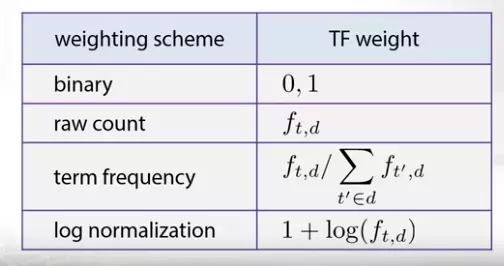



1.   Cách 1: đưa 0 hoặc 1 vào tương ứng với việc token đấy có xuất hiện / không xuất hiện trong input text.

2.   Cách 2: đưa vào giá trị đếm số lần xuất hiện một cách thông thường (raw count), tức là có bao nhiêu lần term t xuất hiện trong documents. Ký hiệu cho giá trị này là f.

3. Cách 3: tính tống số lần xuất hiện của tất cả các term trong document $d$. Sau đó chia giá trị $f$ ở **cách 2** cho tổng vừa tìm được. Như vậy giá trị **tf** sẽ khoảng (0, 1). Điều này biểu thị cho đối với tổng số lần xuất hiện của tất cả các term thì term t xuất hiện nhiều hay ít.

4. Cách 4: lược đồ chuẩn hóa logarit.

5. Cách 5: là cách hay được dùng.

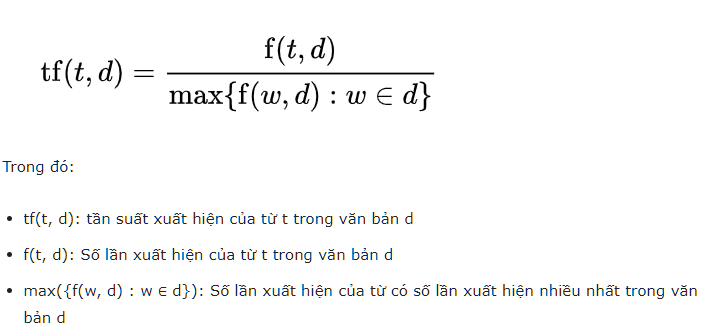



##IDF

IDF (Inverse document frequency): nghịch đảo tần suất của văn bản, giúp đánh giá tầm quan trọng của 1 từ. Khi tính toán $TF$ , tất cả các từ được coi như có độ quan trọng bằng nhau. Nhưng một số từ như “is”, “of” hay “that” thường xuất hiện rất nhiều lần nhưng độ quan trọng là không cao, cần giảm độ quan trọng của những từ này xuống.

Ký hiệu: $N$: tổng tất cả các documents trong corpus. $D$: corpus.

Ta cần tìm số lượng documents chứa term t, ký hiệu là idf(t, D)

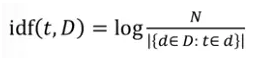


##TF-IDF

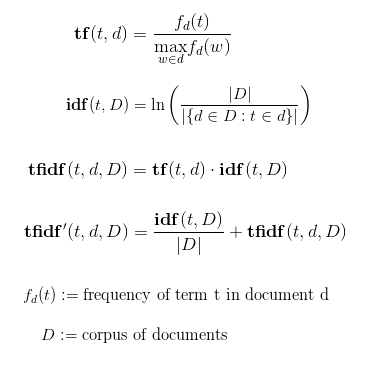

Giá trị $TF-IDF$ cao khi giá trị $TF$ cao (tức là tần suất xuất hiện của term t trên document d cao) và tần suất của các documents chứa term t trên toàn bộ tập dữ liệu thấp (khi tần suất này mà thấp thì giá trị IDF sẽ lớn). Điều này phản ánh việc term t gần như chỉ tập trung vào trong document mà ta đang xét, và giá trị TF-IDF cao có tác dụng highlight term này để phân biệt được documents đang xét trong toàn bộ tập dữ liệu.

In [19]:
sentenceA = "This is a Great Learning now start learning"
sentenceB = "Learning is a good practice"
sentenceA.strip()
sentenceB.strip()
sentenceA.replace("\\s+"," ")
sentenceB.replace("\\s+"," ")
wordA = sentenceA.lower().split()
wordB = sentenceB.lower().split()
dictionary = set(wordA).union(set(wordB))
wordictA = dict.fromkeys(dictionary,0)
wordictB = dict.fromkeys(dictionary,0)
for i in wordA:
  wordictA[i]+=1
for i in wordB:
  wordictB[i]+=1

In [20]:
import pandas as pd
pd.DataFrame([wordictA,wordictB])

,this,now,a,good,great,is,practice,start,learning
0,1,1,1,0,1,1,0,1,2
1,0,0,1,1,0,1,1,0,1


In [21]:
def countTF(wordict,words):
  tfDict = {}
  countmax = len(words)
  for word,count in wordict.items():
    tfDict[word]  = count/countmax
  return tfDict

In [22]:
tfdocA = countTF(wordictA,wordA)
tfdocB = countTF(wordictB,wordB)
tfdocA

{'this': 0.125,
 'now': 0.125,
 'a': 0.125,
 'good': 0.0,
 'great': 0.125,
 'is': 0.125,
 'practice': 0.0,
 'start': 0.125,
 'learning': 0.25}

In [23]:
tfdocB

{'this': 0.0,
 'now': 0.0,
 'a': 0.2,
 'good': 0.2,
 'great': 0.0,
 'is': 0.2,
 'practice': 0.2,
 'start': 0.0,
 'learning': 0.2}

In [24]:
def countIDF(doc):
  import math as mt
  idfDict = dict.fromkeys(dictionary,0)
  N = len(doc)
  for i in doc:
    for key,val in i.items():
      if val>0:
        idfDict[key]+=1
  for key,val in idfDict.items():
    idfDict[key] = mt.log10(N/val)
  return idfDict

In [25]:
idfDict = countIDF([wordictA,wordictB])
idfDict

{'this': 0.3010299956639812,
 'now': 0.3010299956639812,
 'a': 0.0,
 'good': 0.3010299956639812,
 'great': 0.3010299956639812,
 'is': 0.0,
 'practice': 0.3010299956639812,
 'start': 0.3010299956639812,
 'learning': 0.0}

In [30]:
def countTFIDF(tfdoc,idfDict):
   tfidf = dict.fromkeys(dictionary,0)
   for key,val in tfdoc.items():
     tfidf[key] = val * idfDict[key]
   return tfidf

In [35]:
tfidfA = countTFIDF(tfdocA,idfDict)
tfidfB = countTFIDF(tfdocB,idfDict)

In [36]:
pd.DataFrame([tfidfA,tfidfB])

,this,now,a,good,great,is,practice,start,learning
0,0.037629,0.037629,0.0,0.000000,0.037629,0.0,0.000000,0.037629,0.0
1,0.000000,0.000000,0.0,0.060206,0.000000,0.0,0.060206,0.000000,0.0
